# imports 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import wrangle 

from wordcloud import WordCloud

# Wrangle
- Load the README data set.

In [15]:
df = wrangle.get_search_csv()
df = wrangle.prep_text(df)


Removed 201 stopwords
---

Removed 49 stopwords
---

Removed 2 stopwords
---

Removed 218 stopwords
---

Removed 401 stopwords
---

Removed 0 stopwords
---

Removed 50 stopwords
---

Removed 8 stopwords
---

Removed 158 stopwords
---

Removed 21 stopwords
---

Removed 44 stopwords
---

Removed 110 stopwords
---

Removed 500 stopwords
---

Removed 494 stopwords
---

Removed 31 stopwords
---

Removed 427 stopwords
---

Removed 76 stopwords
---

Removed 1 stopwords
---

Removed 175 stopwords
---

Removed 731 stopwords
---

Removed 68 stopwords
---

Removed 58 stopwords
---

Removed 358 stopwords
---

Removed 52 stopwords
---

Removed 15 stopwords
---

Removed 48 stopwords
---

Removed 100 stopwords
---

Removed 116 stopwords
---

Removed 0 stopwords
---

Removed 134 stopwords
---

Removed 320 stopwords
---

Removed 27 stopwords
---

Removed 74 stopwords
---

Removed 88 stopwords
---

Removed 8 stopwords
---

Removed 272 stopwords
---

Removed 123 stopwords
---

Removed 389 stopwords
---


# Explore
* created function to *flatten* the languages into less categories
    - went from 21 categories down to 6

In [16]:
language_freq = df.language.value_counts()
    
#quick takeaway --> lets combine those with 3 or less into other
#we can then backport the code to the wrangle portion
language_freq.size

6

In [17]:
def flatten_languages(language):

    keepers = ['Python', 'R', 'JavaScript', 'Jupyter Notebook', 'HTML']
    
    if language not in keepers:
        language = 'Other'

    return language

In [18]:
df.language = df.language.apply(flatten_languages)

In [19]:
df.language.value_counts()

Python              31
Other               24
R                   13
JavaScript          12
Jupyter Notebook    11
HTML                 7
Name: language, dtype: int64

## Univariate
- histogram of langauges, 
- value counts of words by langauge ?

<AxesSubplot:>

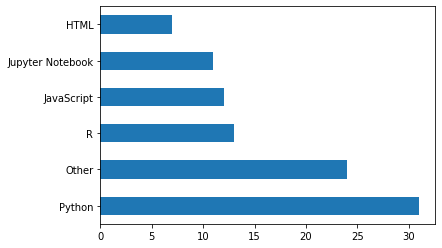

In [20]:
df.language.value_counts().plot.barh()

Create and explore bigrams for the README data.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 108
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   repo        98 non-null     object
 1   language    98 non-null     object
 2   readme_txt  98 non-null     object
 3   clean       98 non-null     object
 4   stemmed     98 non-null     object
 5   lemmatized  98 non-null     object
dtypes: object(6)
memory usage: 5.4+ KB


In [51]:
#created class in order to facilitate bigram and trigram creation
class code_language:
  def __init__(self, words, label:str):
    self.words = words
    self.label = label

    
  def bigrams(self):
    return pd.Series(list(nltk.bigrams(self.words.split())))

  def trigrams(self):
    return pd.Series(list(nltk.ngrams(self.words.split(), 3)))


In [49]:
html = code_language(words=' '.join(df[df.language == 'HTML'].lemmatized), label='html')

In [50]:
html.bigrams()

0                 (p, aligncenter)
1              (aligncenter, href)
2              (href, targetblank)
3       (targetblank, relnoopener)
4        (relnoopener, noreferrer)
                   ...            
2879         (additional, package)
2880      (package, automatically)
2881     (automatically, acquired)
2882             (acquired, using)
2883                 (using, cdns)
Length: 2884, dtype: object

In [23]:
# this initilizes the class objects. 
html = code_language(words=' '.join(df[df.language == 'HTML'].lemmatized), label='html')
jupyter = code_language(words=' '.join(df[df.language == 'Jupyter Notebook'].lemmatized), label='jupyter')
javascript = code_language(words=' '.join(df[df.language == 'JavaScript'].lemmatized), label='javascript')
r_ = code_language(words=' '.join(df[df.language == 'R'].lemmatized), label='r')
other_ = code_language(words=' '.join(df[df.language == 'Other'].lemmatized), label='other')
python_ = code_language(words=' '.join(df[df.language == 'Python'].lemmatized), label='python')


In [25]:
#this will join all the entire text column for entries labled ham
# runs them through  function
# html_words = ' '.join(df[df.language == 'HTML'].lemmatized)
# jupyter_words = ' '.join(df[df.language == 'Jupyter Notebook'].lemmatized)
# javascript_words =  ' '.join(df[df.language == 'JavaScript'].lemmatized)
# r_words =  ' '.join(df[df.language == 'R'].lemmatized)
# other_words =  ' '.join(df[df.language == 'Other'].lemmatized)
# python_words =  ' '.join(df[df.language == 'Python'].lemmatized)
# html_bigrams = pd.Series(list(nltk.bigrams(html_words)))
# jupyter_bigrams = pd.Series(list(nltk.bigrams(jupyter_words)))
# javascript_bigrams = pd.Series(list(nltk.bigrams(javascript_words)))
# r_bigrams = pd.Series(list(nltk.bigrams(r_words)))
# other_bigrams = pd.Series(list(nltk.bigrams(other_words)))
# python_bigrams = pd.Series(list(nltk.bigrams(python_words)))
# html_trigrams = pd.Series(list(nltk.ngrams(html_words.split(), 3)))
# jupyter_trigrams = pd.Series(list(nltk.ngrams(jupyter_words.split(), 3)))
# javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3)))
# r_trigrams = pd.Series(list(nltk.ngrams(r_words.split(), 3)))
# other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3)))
# python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3)))

In [24]:
languages = [html, jupyter, javascript, r_, other_, python_]

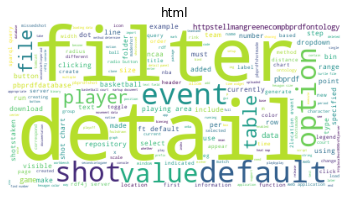

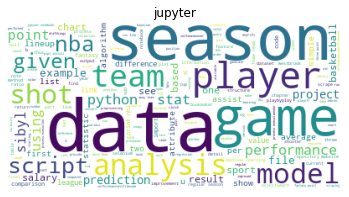

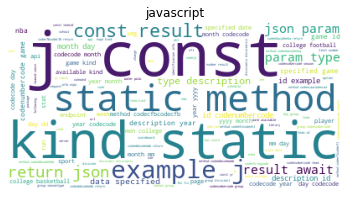

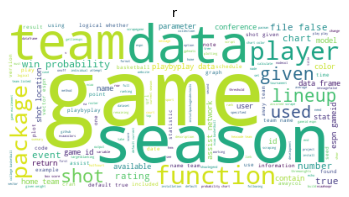

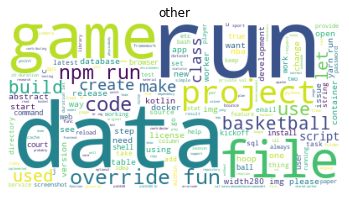

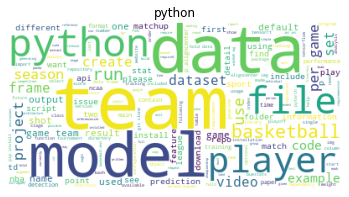

In [26]:
# iterates over the languages and creates a word cloud for each one 
for language in languages:
    
    #the words themselves can be accessed with dot notation on the object. same with the label
    img = WordCloud(background_color='white')\
        .generate(language.words)

    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()



 Visualize them with a word cloud. How do they compare with the ham bigrams?


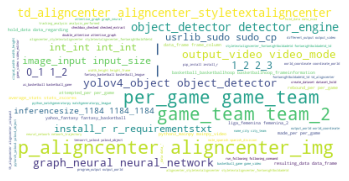

In [27]:

for language in languages:
    img = WordCloud(background_color='white', collocation_threshold=3, collocations=True)\
        .generate(' '.join(language.bigrams().apply('_'.join)))\
        #.generate(' ' .join(pd.Series(list(ham_words))))

    plt.imshow(img)
    plt.axis('off')

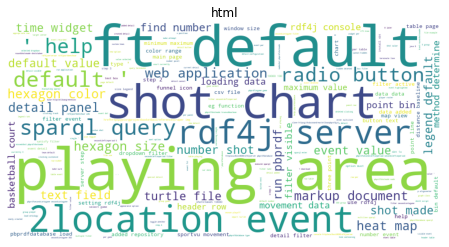

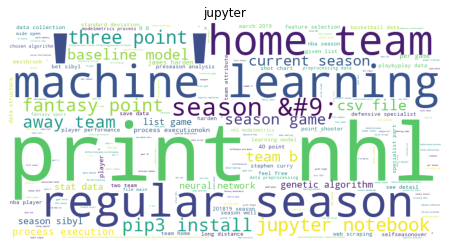

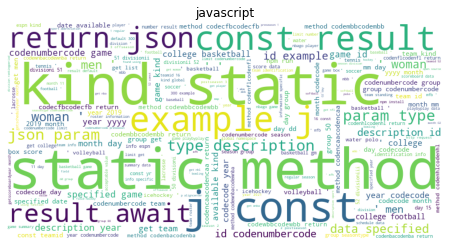

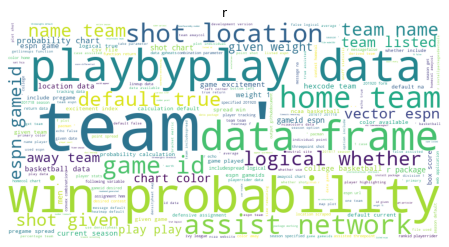

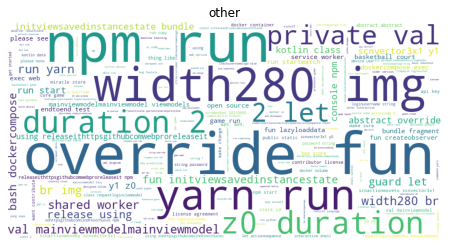

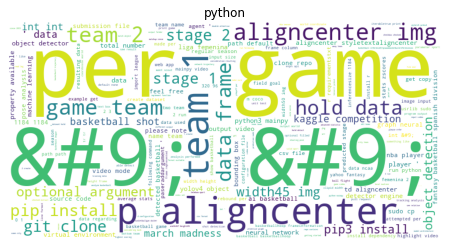

In [28]:
for language in languages:
    data = {' '.join(k): v for k, v in language.bigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

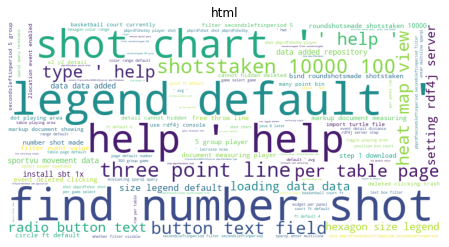

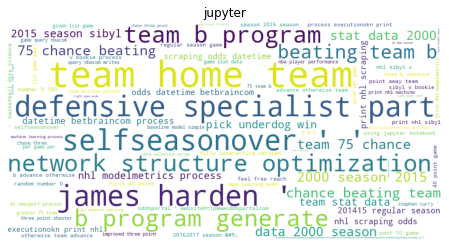

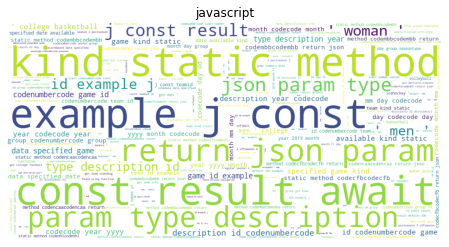

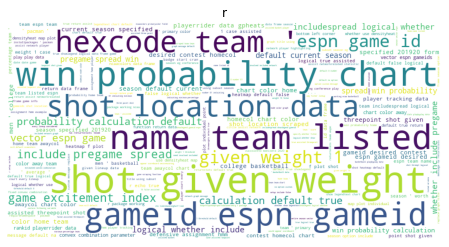

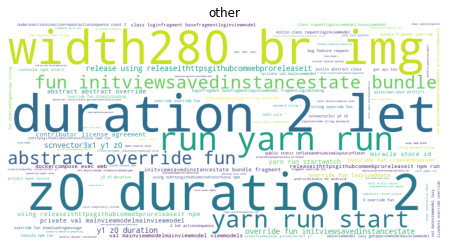

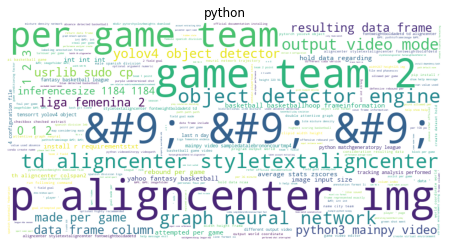

In [29]:
for language in languages:
    data = {' '.join(k): v for k, v in language.trigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()